In [ ]:
import tensorflow as tf

# Ensure TensorFlow detects the GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Configure GPU memory allocation (prevents OOM errors)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    except RuntimeError as e:
        print(e)


Num GPUs Available:  1


In [ ]:
print("Reg No: URK23AI006")
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt

# Download Shakespeare's works (or load from local file)
shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
shakespeare_text = get_file("shakespeare.txt", shakespeare_url)

# Load the text
with open(shakespeare_text, "r") as file:
    text = file.read()

print(f"Text Length: {len(text)}")
print(text[:1000])  # Preview the first 1000 characters

Reg No: URK23AI006
Text Length: 1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger

In [ ]:
print("Reg No: URK23AI006")
# Create a mapping from characters to integers and vice versa
chars = sorted(set(text))  # Set of unique characters
char_to_int = {char: i for i, char in enumerate(chars)}
int_to_char = {i: char for i, char in enumerate(chars)}

# Convert text into a sequence of integers
text_as_int = np.array([char_to_int[char] for char in text])

# Define sequence length (e.g., 100 characters per input sequence)
sequence_length = 100
X = []
y = []

# Prepare sequences for the model
for i in range(0, len(text_as_int) - sequence_length):
    X.append(text_as_int[i:i + sequence_length])
    y.append(text_as_int[i + sequence_length])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be compatible with LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Normalize X to be between 0 and 1
X = X / float(len(chars))

# One-hot encode y
y = tf.keras.utils.to_categorical(y, num_classes=len(chars))

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

Reg No: URK23AI006
X shape: (1115294, 100, 1)
y shape: (1115294, 65)


In [ ]:
print("Reg No: URK23AI006")
# Build the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(len(chars), activation='softmax'))  # Output layer for character prediction

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Reg No: URK23AI006


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                   │ (None, 100, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 65)             │        16,705 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,001 (3.33 MB)

 Trainable params: 872,001 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# # Train the model
# history = model.fit(X, y, epochs=30, batch_size=128)

# # Plot training loss
# plt.plot(history.history['loss'])
# plt.title('Model Loss during Training')
# plt.xlabel('Epochs')
# plt.ylabel('Loss')
# plt.show()

In [ ]:
print("Reg No: URK23AI006")
# Generate text from the trained model
def generate_text(seed, length=100):
    # Convert the seed to integers
    seed = [char_to_int[char] for char in seed]

    # Reshape the seed for prediction (1 sample, sequence length, 1 feature)
    seed = np.reshape(seed, (1, len(seed), 1)) / float(len(chars))

    # Generate text
    generated_text = seed
    for i in range(length):
        prediction = model.predict(seed, verbose=0)
        predicted_char_index = np.argmax(prediction)

        # Convert predicted index to character
        predicted_char = int_to_char[predicted_char_index]
        generated_text = np.append(generated_text, predicted_char)

        # Update the seed for the next prediction
        seed = np.append(seed[0, 1:], predicted_char_index)
        seed = np.reshape(seed, (1, len(seed), 1)) / float(len(chars))

    return ''.join(generated_text)

# Generate some text
seed_text = "Shall I compare thee to a summer's day?"
generated_text = generate_text(seed_text, length=500)
print(generated_text)

Reg No: URK23AI006
0.476923076923076950.70769230769230770.60.76923076923076930.76923076923076930.0153846153846153850.32307692307692310.0153846153846153850.63076923076923070.81538461538461540.78461538461538460.83076923076923080.60.86153846153846160.66153846153846150.0153846153846153850.89230769230769240.70769230769230770.66153846153846150.66153846153846150.0153846153846153850.89230769230769240.81538461538461540.0153846153846153850.60.0153846153846153850.87692307692307690.90769230769230770.78461538461538460.78461538461538460.66153846153846150.86153846153846160.076923076923076930.87692307692307690.0153846153846153850.64615384615384620.60.96923076923076920.18461538461538463Eddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddddd

Reg No: URK23AI006
Text Length: 1115394
First Citizen:
Before we proceed any further, hear me speak.

All:
Speak, speak.

First Citizen:
You are all resolved rather to die than to famish?

All:
Resolved. resolved.

First Citizen:
First, you know Caius Marcius is chief enemy to the people.

All:
We know't, we know't.

First Citizen:
Let us kill him, and we'll have corn at our own price.
Is't a verdict?

All:
No more talking on't; let it be done: away, away!

Second Citizen:
One word, good citizens.

First Citizen:
We are accounted poor citizens, the patricians good.
What authority surfeits on would relieve us: if they
would yield us but the superfluity, while it were
wholesome, we might guess they relieved us humanely;
but they think we are too dear: the leanness that
afflicts us, the object of our misery, is as an
inventory to particularise their abundance; our
sufferance is a gain to them Let us revenge this with
our pikes, ere we become rakes: for the gods know I
speak this in hunger

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                   │ (None, 100, 256)       │       264,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 256)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 57)             │        14,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 869,945 (3.32 MB)

 Trainable params: 869,945 (3.32 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 0.1264 - loss: 3.4316
Epoch 2/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1390 - loss: 3.2556
Epoch 3/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.1487 - loss: 3.2420
Epoch 4/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1465 - loss: 3.2476
Epoch 5/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 30ms/step - accuracy: 0.1534 - loss: 3.2068
Epoch 6/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1512 - loss: 3.1988
Epoch 7/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1614 - loss: 3.1226
Epoch 8/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.1746 - loss: 3.0238
Epoch 9/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1900 - loss: 2.9397
Epoch 10/10
78/78 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.1987 - loss: 2.8810


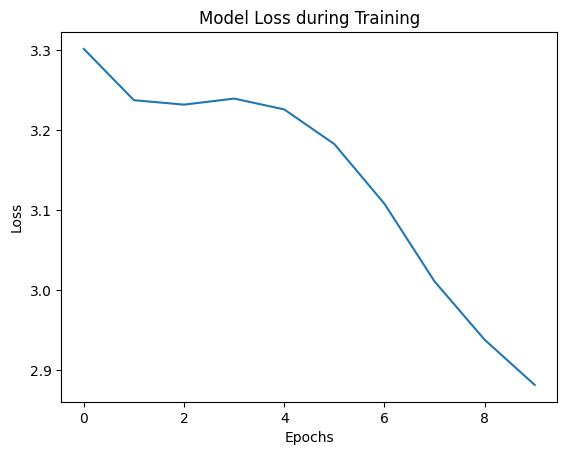

'0.438596491228070150.66666666666666660.5438596491228070.73684210526315790.73684210526315790.0175438596491228060.29824561403508770.0175438596491228060.57894736842105270.78947368421052630.75438596491228070.80701754385964910.5438596491228070.84210526315789470.61403508771929830.0175438596491228060.87719298245614030.66666666666666660.61403508771929830.61403508771929830.0175438596491228060.87719298245614030.78947368421052630.0175438596491228060.5438596491228070.0175438596491228060.85964912280701760.89473684210526320.75438596491228070.75438596491228070.61403508771929830.84210526315789470.052631578947368420.85964912280701760.0175438596491228060.59649122807017540.5438596491228070.96491228070175440.15789473684210525tSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS

In [ ]:
print("Reg No: URK23AI006")
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import get_file
import matplotlib.pyplot as plt

# Download Shakespeare's works (or load from local file)
shakespeare_url = "https://raw.githubusercontent.com/karpathy/char-rnn/master/data/tinyshakespeare/input.txt"
shakespeare_text = get_file("shakespeare.txt", shakespeare_url)

# Load the text
with open(shakespeare_text, "r") as file:
    text = file.read()

print(f"Text Length: {len(text)}")
# take only less amount of data only and run this full code to get the output
text = text[:10000] # Taking only 10000 characters
print(text[:1000])  # Preview the first 1000 characters
# Create a mapping from characters to integers and vice versa
chars = sorted(set(text))  # Set of unique characters
char_to_int = {char: i for i, char in enumerate(chars)}
int_to_char = {i: char for i, char in enumerate(chars)}

# Convert text into a sequence of integers
text_as_int = np.array([char_to_int[char] for char in text])

# Define sequence length (e.g., 100 characters per input sequence)
sequence_length = 100
X = []
y = []

# Prepare sequences for the model
for i in range(0, len(text_as_int) - sequence_length):
    X.append(text_as_int[i:i + sequence_length])
    y.append(text_as_int[i + sequence_length])

# Convert X and y to numpy arrays
X = np.array(X)
y = np.array(y)

# Reshape X to be compatible with LSTM (samples, time_steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Normalize X to be between 0 and 1
X = X / float(len(chars))

# One-hot encode y
y = tf.keras.utils.to_categorical(y, num_classes=len(chars))

print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
# Build the LSTM model
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(256, input_shape=(X.shape[1], X.shape[2]), return_sequences=True))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.LSTM(256))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(len(chars), activation='softmax'))  # Output layer for character prediction

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()
# Train the model
history = model.fit(X, y, epochs=10, batch_size=128) # Reduce the number of epochs

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss during Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()
# Generate text from the trained model
def generate_text(seed, length=100):
    # Convert the seed to integers
    seed = [char_to_int[char] for char in seed]

    # Reshape the seed for prediction (1 sample, sequence length, 1 feature)
    seed = np.reshape(seed, (1, len(seed), 1)) / float(len(chars))

    # Generate text
    generated_text = seed
    for i in range(length):
        prediction = model.predict(seed, verbose=0)
        predicted_char_index = np.argmax(prediction)

        # Convert predicted index to character
        predicted_char = int_to_char[predicted_char_index]
        generated_text = np.append(generated_text, predicted_char)

        # Update the seed for the next prediction
        seed = np.append(seed[0, 1:], predicted_char_index)
        seed = np.reshape(seed, (1, len(seed), 1)) / float(len(chars))

    return ''.join(generated_text)

# Generate some text
seed_text = "Shall I compare thee to a summer's day?"
generated_text = generate_text(seed_text, length=500)
generated_text
